In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import random

In [39]:
data = pd.read_csv("../datasets/nb/train.csv")
data.shape

(42000, 785)

In [40]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X = data.drop(columns='label')
y = data['label']

X = np.clip(X,0,1)

X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=42,test_size=0.20, shuffle=True)

In [42]:
#Features are binary (0 or 1) — indicating presence or absence so BernoulliNB is used
clf = BernoulliNB()
clf.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [43]:
y_pred = clf.predict(X_test)
print('Accuracy of NB is', accuracy_score(y_test, y_pred)*100,'%')

Accuracy of NB is 83.05952380952381 %


True label: 6 predicted: 6


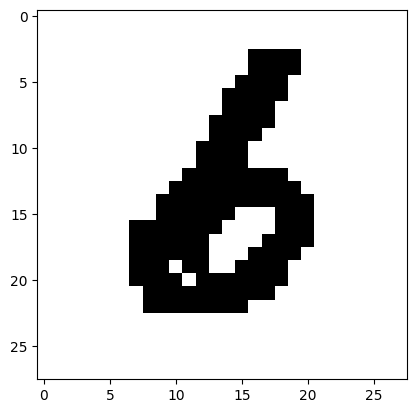

In [81]:
id = random.randint(0, len(X_test) - 1) 
B = X_test.iloc[id].values  
B = np.reshape(B, (28, 28))  


print('True label:',y_test.iloc[id], 'predicted:', y_pred[id])
plt.imshow(B, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


## Other types of NB
- MultinomialNB: Best for discrete count data, like word frequencies in text.
- GaussianNB: Use for continuous data assuming a normal distribution per class.
- BernoulliNB: Ideal for binary/boolean features indicating presence or absence.